<h1> In this note-book we will explore the data and also we will try to find and fix the outliars

In [1]:
%config IPCompleter.use_jedi = False 
%config Completer.evaluation = 'limited'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
# load the cleaned dataset
cars = pd.read_csv('../Data\\cleaned_car_data.csv')
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
4,Ford Figo,Ford,2012,175000.0,41000,Diesel


In [7]:
cars.describe()

,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


In [8]:
# price 85lakh seems a outliar. Let's check how many car has price more than 60lakh

cars[cars['Price'] >= 60e5]

,name,company,year,Price,kms_driven,fuel_type
447,Mahindra XUV500 W6,Mahindra,2014,8500003.0,45000,Diesel


In [9]:
# let's check 50 lakh
cars[cars['Price'] >= 50e5]

,name,company,year,Price,kms_driven,fuel_type
447,Mahindra XUV500 W6,Mahindra,2014,8500003.0,45000,Diesel


In [16]:
cars[cars['Price'] >= 40e5]

,name,company,year,Price,kms_driven,fuel_type
447,Mahindra XUV500 W6,Mahindra,2014,8500003.0,45000,Diesel


In [18]:
# Only 1 car has price more that 40 lakh which is a outliar. Remove this
cars = cars[cars['Price'] <= 40e5]

In [19]:
cars.shape

(723, 6)

<h2> Lets check the kms_driven col

In [20]:
cars[cars['kms_driven'] == 400000]

,name,company,year,Price,kms_driven,fuel_type
280,Honda City 1.5,Honda,2010,240000.0,400000,Petrol


In [24]:
cars[cars['kms_driven'] >= 250000]

,name,company,year,Price,kms_driven,fuel_type
280,Honda City 1.5,Honda,2010,240000.0,400000,Petrol


**280	Honda City 1.5	Honda	2010	240000.0	400000	Petrol** <br>
**It's seems a outliar**

In [26]:
cars = cars[cars['kms_driven'] < 250000]

<h2> Let's check the year column

In [28]:
cars['year'].describe()

count     722.000000
mean     2012.322715
std         4.127276
min      1995.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2019.000000
Name: year, dtype: float64

<h2> Let's check relation of target col with others

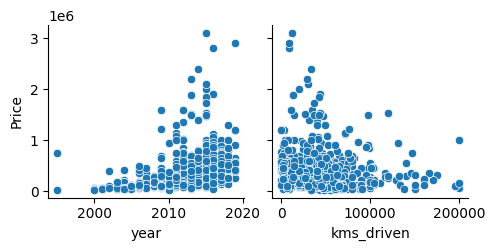

In [29]:
sns.pairplot(data = cars , x_vars = ['year' , 'kms_driven'] , y_vars = 'Price')
plt.show()

In [31]:
cars[['year' , 'kms_driven' ,'Price']].corr()

,year,kms_driven,Price
year,1.000000,-0.262604,0.363369
kms_driven,-0.262604,1.000000,-0.163794
Price,0.363369,-0.163794,1.000000


<Axes: xlabel='Price', ylabel='Count'>

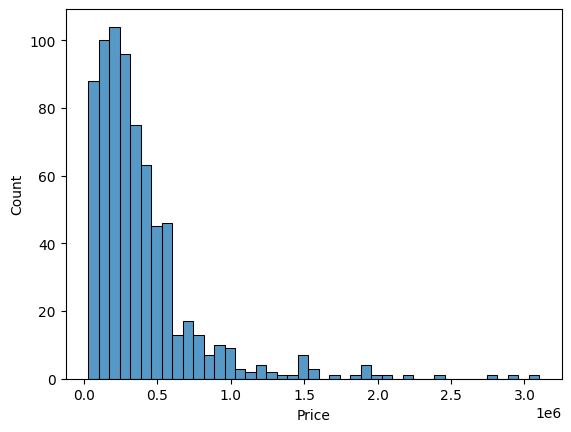

In [33]:
sns.histplot(data = cars , x = 'Price')